In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#load the dataset
df = pd.read_csv('HousingData.csv')

#Print the shape of the dataset
print('Shape of the dataset:', df.shape)
df.head()

Shape of the dataset: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


1. CRIM=      per capita crime rate by town
2. ZN=        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS=     proportion of non-retail business acres per town
4. CHAS=      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX=       nitric oxides concentration (parts per 10 million)
6. RM=        average number of rooms per dwelling
7. AGE=       proportion of owner-occupied units built prior to 1940
8. DIS=       weighted distances to five Boston employment centres
9. RAD=       index of accessibility to radial highways
10. TAX=      full-value property-tax rate per 10,000 dollars
11. PTRATIO=  pupil-teacher ratio by town
12. B=        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT=    % lower status of the population
14. MEDV=     Median value of owner-occupied homes in 1000 dollar's

In [2]:
#Feature types and missing values
print('Data types of features:\n', df.dtypes)
print('----------------------------------------')
print('Number of missing values:\n', df.isna().sum())

Data types of features:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
----------------------------------------
Number of missing values:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


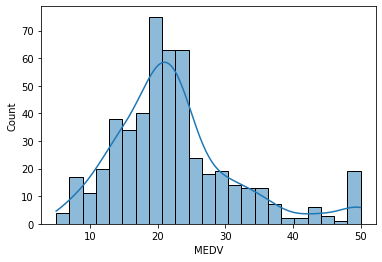

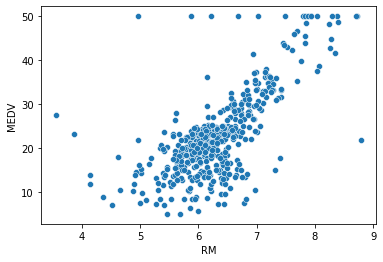

In [3]:
#Distribution of important features
#Create a histogram of the MEDV column
sns.histplot(df['MEDV'], kde=True)
plt.show()

#Create a scatter plot of the RM and MEDV columns
sns.scatterplot(data=df, x='RM', y='MEDV')
plt.show()

In [4]:
#Finding missing columns
missing_cols = df.columns[df.isnull().any()]
num_missing_cols = len(missing_cols)
print("Number of columns with missing values:", num_missing_cols)

Number of columns with missing values: 6


In [5]:
#Dropping missing columns
df=df.dropna()
missing_cols = df.columns[df.isnull().any()]
num_missing_cols = len(missing_cols)
print("Number of columns with missing values after dropping them:", num_missing_cols)

Number of columns with missing values after dropping them: 0


In [6]:
#Interquartile Range (IQR) method to find outliers

#Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) of the dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#Identify the outliers in the dataset using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sum()

print("Number of outliers before removal: ", outliers)

Number of outliers before removal:  260


In [7]:
#Removing outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

#See if any outlier left
outliers_removed = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sum()

print("Number of outliers after removal: ", outliers_removed)

Number of outliers after removal:  0


Every feature in Boston Housing dataset are numerical and in a similar scale, so there is no need to apply any specific transformation or encoding. 

Ex: the "RM" feature represents the average number of rooms per dwelling, which can range from 3 to 9, while the "TAX" feature represents the full-value property-tax rate per 10,000 dollars, which can range from 187 to 711. 

But both features are still in a similar scale, they can both represent some characteristics of the houses and can be compared with each other.

Also this dataset does not have any categorical features (CHAS is also numerical), so no need for encoding

<AxesSubplot:>

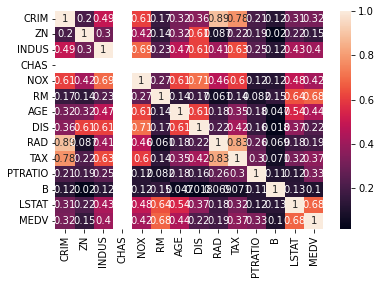

In [8]:
#Heatmap for feature comparison
sns.heatmap(df.corr().abs(), annot=True)

In [9]:
#List the features according to highest to lowest correlation with the MEDV
df.corr().abs()["MEDV"].nlargest(20)

MEDV       1.000000
LSTAT      0.679860
RM         0.678150
AGE        0.440684
NOX        0.418711
INDUS      0.403472
TAX        0.369924
PTRATIO    0.330153
CRIM       0.319912
DIS        0.221995
RAD        0.190236
ZN         0.153678
B          0.100440
Name: MEDV, dtype: float64

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

#Convert the target variable to a binary variable indicating above or below median
df['MEDV_bin'] = (df['MEDV'] > df['MEDV'].median()).astype(int)

#Split the dataset into features and target variable (MEDV)
X = df.drop(['MEDV', 'MEDV_bin'], axis=1)
y = df['MEDV_bin']

#Train random forest classifier and get feature importances
rf = RandomForestClassifier()
rf.fit(X, y)
importances = rf.feature_importances_

#Print feature importances
feature_importances = pd.Series(importances, index=X.columns)
print('Feature importances:')
print(feature_importances.sort_values(ascending=False))

Feature importances:
LSTAT      0.190460
RM         0.185765
AGE        0.153214
NOX        0.100453
DIS        0.068481
PTRATIO    0.066832
CRIM       0.065178
INDUS      0.053257
B          0.049900
TAX        0.038832
RAD        0.020583
ZN         0.007044
CHAS       0.000000
dtype: float64


In [11]:
import datetime

# Filter the dataset to include only the top features
top_features = ['MEDV', 'LSTAT', 'RM', 'AGE', 'NOX']
df = df[top_features]

# Compute the construction year of the house
current_year = datetime.datetime.now().year
df['AGE'] = current_year - df['AGE']
# Print the resulting dataset
print("Resulting dataset: \n", df.head())

Resulting dataset: 
    MEDV  LSTAT     RM     AGE    NOX
0  24.0   4.98  6.575  1957.8  0.538
1  21.6   9.14  6.421  1944.1  0.469
2  34.7   4.03  7.185  1961.9  0.469
3  33.4   2.94  6.998  1977.2  0.458
5  28.7   5.21  6.430  1964.3  0.458


In [12]:
from sklearn.decomposition import PCA

#Apply PCA to the dataset
#Create a PCA object with 2 components
pca = PCA(n_components=2)
#Fit the model
pca.fit(df)
#Transform dataset
pca_df = pca.fit_transform(df)
print("Original shape:   ", df.shape)
print("Transformed shape:", pca_df .shape)

Original shape:    (214, 5)
Transformed shape: (214, 2)


 PCA has reduced the dimensionality of the dataset from 6 to 2, preserving the most important information in the data.